In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df_pl = pd.read_csv("data/Players.csv", index_col = 0)
df_ss = pd.read_csv("data/Seasons_Stats.csv", index_col = 0)
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   collage      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.1+ KB


In [11]:
 #обробили таблицю 1
df_pl.dropna(axis = 0, how = 'all', inplace = True)
len(df_pl)

3921

In [12]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

In [13]:
# обробили таблицю як у файлі seasons_stats + залишаємо такі цікаві для розгляду показники як Player Efficiency Rating, 
# True Shooting %, 3-Point Attempt Rate, Free Throw Rate
print('number of column before:', len(df_ss.columns))
df_ss.drop(index = df_ss[df_ss['3PAr'].isnull()].index, inplace = True)
df_ss.dropna(axis = 0, how = 'all', inplace = True)
df_ss.dropna(axis = 1, how = 'any', inplace = True)
df_ss.drop(['2PA', 'PTS', 'FTA'], axis = 1, inplace = True)
print('number of column after:', len(df_ss.columns))

number of column before: 52
number of column after: 43


In [21]:
df = pd.merge(df_ss, df_pl, on = "Player")
features = ['G', 'born', 'PER', 'TS%', '3PAr', 'DRB%', 'height', 'weight'] #обрали цікаві на наш погляд фічі для візуалізації
df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,STL,BLK,TOV,PF,height,weight,collage,born,birth_city,birth_state
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,...,81.0,280.0,297.0,216.0,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
1,1981.0,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,...,59.0,228.0,249.0,244.0,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
2,1982.0,Kareem Abdul-Jabbar*,C,34.0,LAL,76.0,2677.0,23.4,0.608,0.002,...,63.0,207.0,230.0,224.0,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
3,1983.0,Kareem Abdul-Jabbar*,C,35.0,LAL,79.0,2554.0,23.6,0.619,0.002,...,61.0,170.0,200.0,220.0,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
4,1984.0,Kareem Abdul-Jabbar*,C,36.0,LAL,80.0,2622.0,21.3,0.608,0.001,...,55.0,143.0,221.0,211.0,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18834,2017.0,Troy Williams,SF,22.0,HOU,6.0,139.0,12.8,0.616,0.477,...,3.0,1.0,6.0,18.0,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
18835,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,44.0,6.7,0.437,0.929,...,3.0,1.0,5.0,4.0,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
18836,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,108.0,7.3,0.346,0.000,...,2.0,5.0,3.0,17.0,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
18837,2017.0,Paul Zipser,SF,22.0,CHI,44.0,843.0,6.9,0.503,0.448,...,15.0,16.0,40.0,78.0,203.0,97.0,NaN,1994.0,Heidelberg,Germany


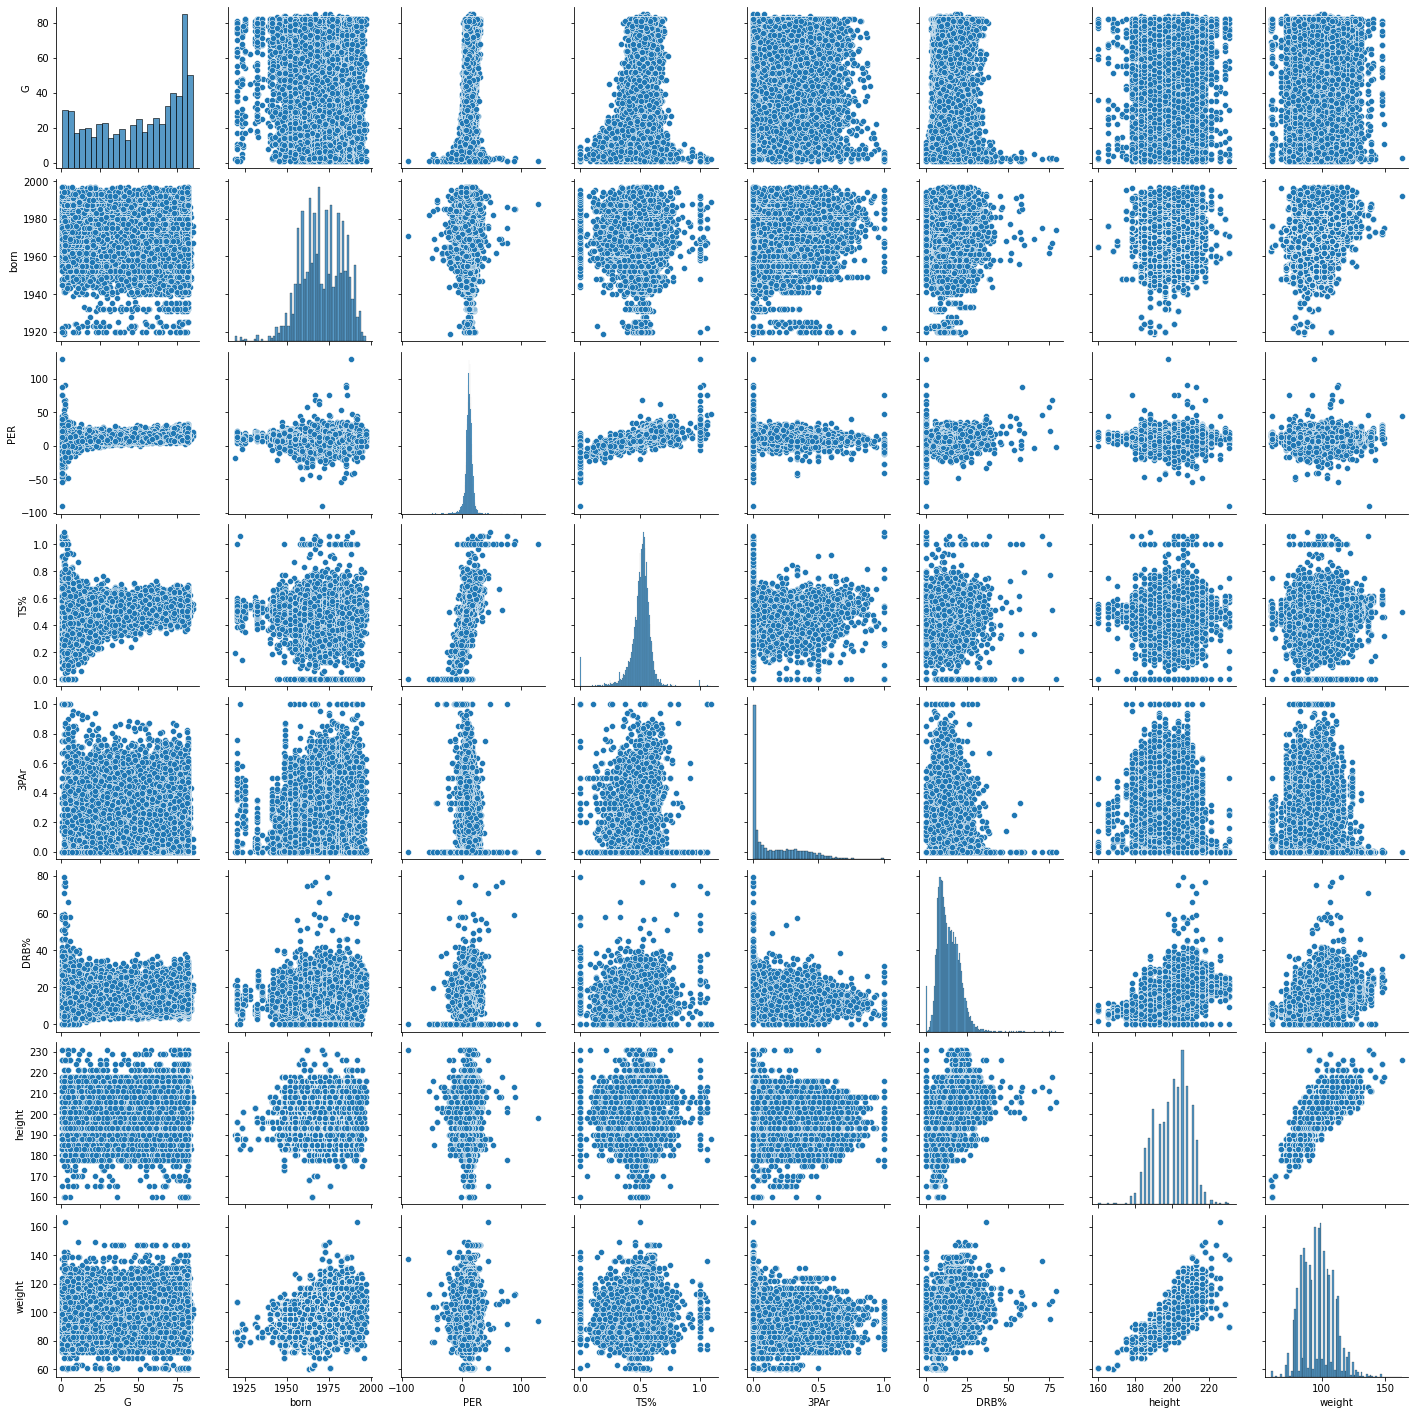

In [22]:
#  будуємо розсіювання для обраних пар показників
sns.pairplot(df[features])

Можна побачити, що на деяких парах показників із країв знаходяться певні викиди. Також бачемо кореляцію між 'PER' та 'TS%'.
Також, можемо спостерігати кореляцію між показниками ваги/висоти та 'DRB%' (відсоток відскоку у обороні).

<AxesSubplot:>

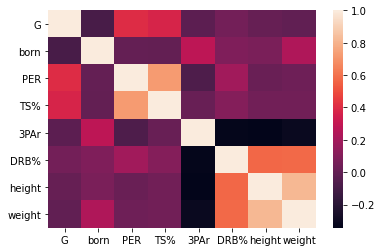

In [23]:
# побудуємо матрицю кореляції
sns.heatmap(df[features].corr())

Тут також бачимо кореляцію цих двох показників

In [36]:
# створимо категорію ваги
df['wctg'] = df['weight'] // 10
df['wctg'].value_counts()

9.0     5947
8.0     4221
10.0    4212
11.0    2140
7.0     1444
12.0     648
13.0     102
6.0       88
14.0      36
16.0       1
Name: wctg, dtype: int64

<AxesSubplot:xlabel='wctg', ylabel='TOV'>

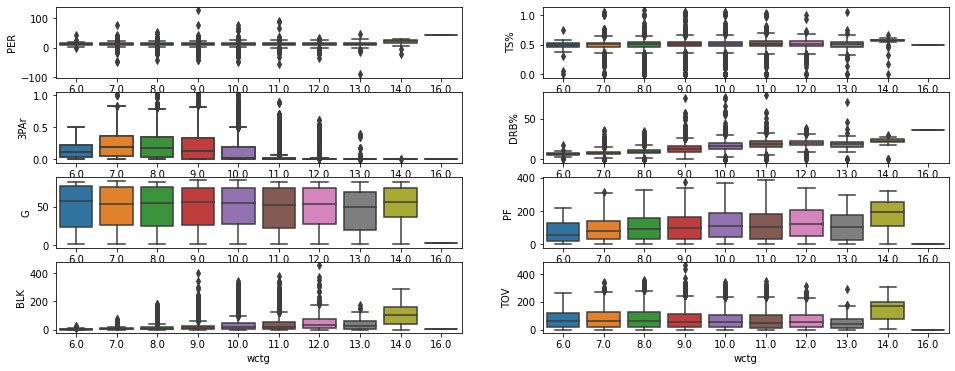

In [66]:
# побудуємо статистичний розподіл деяких показників за вагою
_, axes = plt.subplots(4, 2, figsize = (16, 6))
sns.boxplot(x = df['wctg'], y = df['PER'], ax = axes[0, 0])
sns.boxplot(x = df['wctg'], y = df['TS%'], ax = axes[0, 1])
sns.boxplot(x = df['wctg'], y = df['3PAr'], ax = axes[1, 0])
sns.boxplot(x = df['wctg'], y = df['DRB%'], ax = axes[1, 1])
sns.boxplot(x = df['wctg'], y = df['3PAr'], ax = axes[1, 0])
sns.boxplot(x = df['wctg'], y = df['G'], ax = axes[2, 0])
sns.boxplot(x = df['wctg'], y = df['PF'], ax = axes[2, 1])
sns.boxplot(x = df['wctg'], y = df['BLK'], ax = axes[3, 0])
sns.boxplot(x = df['wctg'], y = df['TOV'], ax = axes[3, 1])

Як можна спостерігати, при більшій вазі більшість показників зростає. Особливо це помітно для гравців із вагою > 140 кг.

Цікаво, що показник "3Par" (3-точковий кількість спроб) навпаки, при збільшені ваги падає.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18839 entries, 0 to 18838
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         18839 non-null  float64
 1   Player       18839 non-null  object 
 2   Pos          18839 non-null  object 
 3   Age          18839 non-null  float64
 4   Tm           18839 non-null  object 
 5   G            18839 non-null  float64
 6   MP           18839 non-null  float64
 7   PER          18839 non-null  float64
 8   TS%          18839 non-null  float64
 9   3PAr         18839 non-null  float64
 10  FTr          18839 non-null  float64
 11  ORB%         18839 non-null  float64
 12  DRB%         18839 non-null  float64
 13  TRB%         18839 non-null  float64
 14  AST%         18839 non-null  float64
 15  STL%         18839 non-null  float64
 16  BLK%         18839 non-null  float64
 17  TOV%         18839 non-null  float64
 18  USG%         18839 non-null  float64
 19  OWS 

In [72]:
df['Tm'].value_counts().head(3)

TOT    1636
CLE     653
GSW     650
Name: Tm, dtype: int64

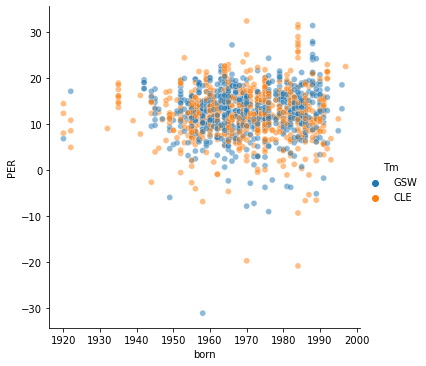

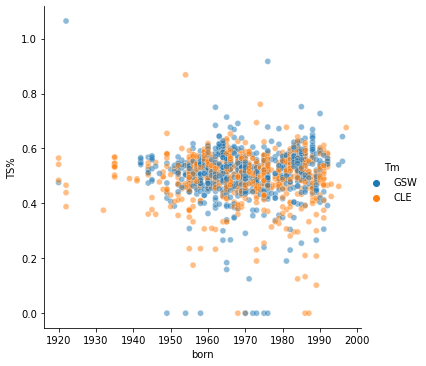

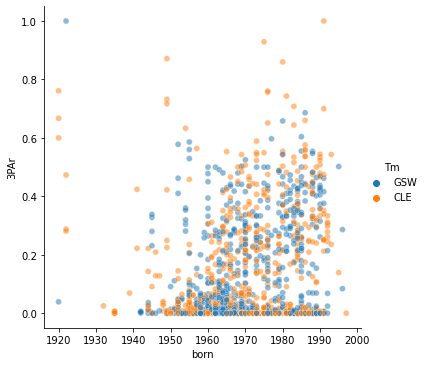

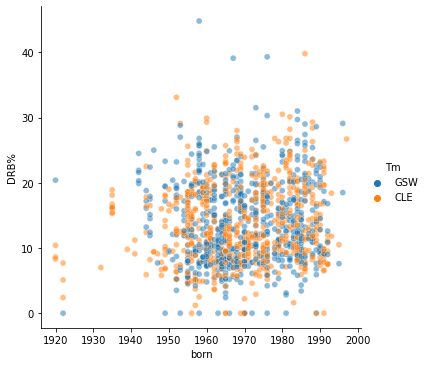

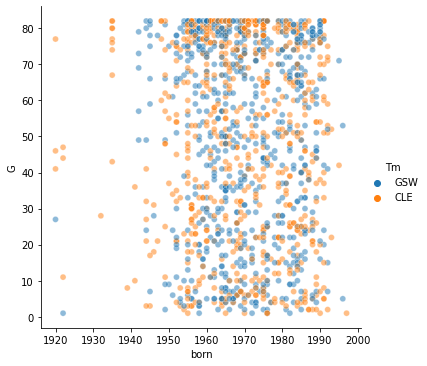

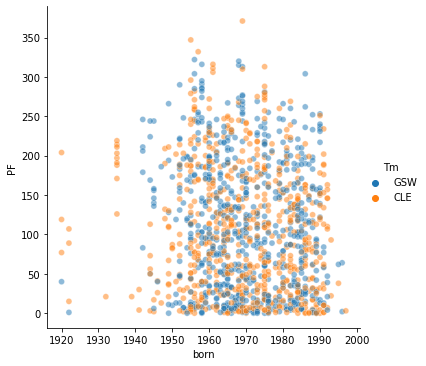

In [110]:
#відобразимо розподіл за роком народження, деякими показниками та двома командами CLE, GSW (приблизна к-ть, зручно для порівняння)
Tms = df['Tm'].value_counts().head(3).index[1:3]

sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = 'PER', hue = 'Tm', alpha = 0.5)
sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = 'TS%', hue = 'Tm', alpha = 0.5)
sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = '3PAr', hue = 'Tm', alpha = 0.5)
sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = 'DRB%', hue = 'Tm', alpha = 0.5)
sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = 'G', hue = 'Tm', alpha = 0.5)
sns.relplot(data = df[df['Tm'].isin(Tms)], x = 'born', y = 'PF', hue = 'Tm', alpha = 0.5)

#df[df['Tm'].isin(Tms)]

Важко зробити певні висновки, оскільки розподіл приблизно однаковий, однак у деякі роки ми бачимо, що команда "GSW" мала менше гравців

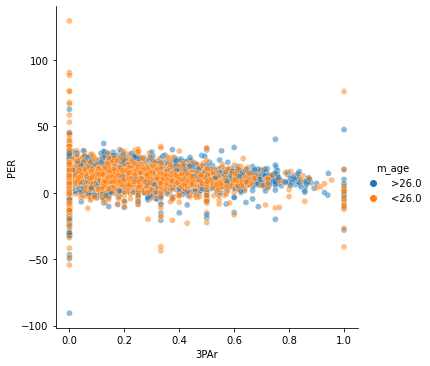

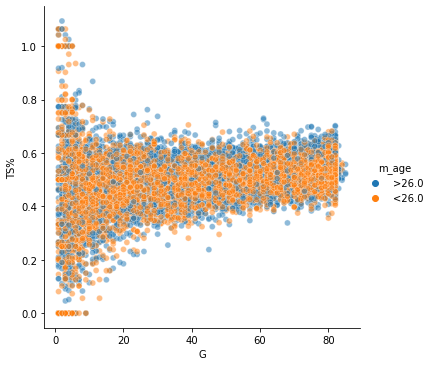

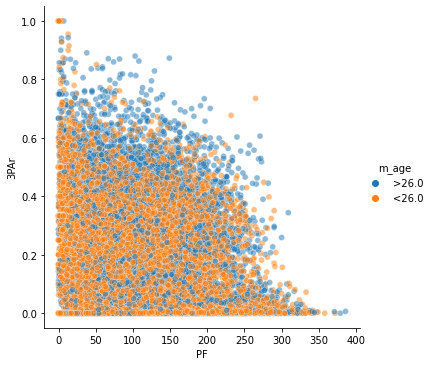

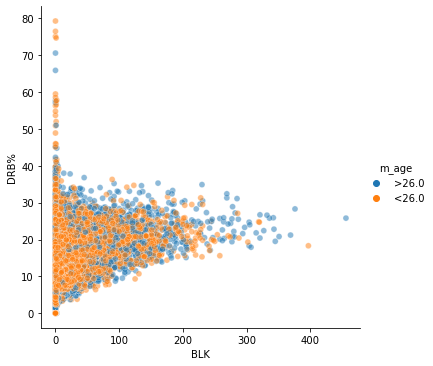

In [134]:
# поділимо вік гравців на 2 категорії по медіані

m_age = df['Age'].median()
df['m_age'] = df['Age'].map(lambda age: '<' + str(m_age) if age < m_age else '>' + str(m_age))

sns.relplot(data = df, x = '3PAr', y = 'PER', hue = 'm_age', alpha = 0.5)
sns.relplot(data = df, x = 'G', y = 'TS%', hue = 'm_age', alpha = 0.5)
sns.relplot(data = df, x = 'PF', y = '3PAr', hue = 'm_age', alpha = 0.5)
sns.relplot(data = df, x = 'BLK', y = 'DRB%', hue = 'm_age', alpha = 0.5)

In [ ]:
Тут можна спостерігати, що для розподілу пар певних показників, виброси для велих значень характерні більше для футболістів > 26 років.
Футболісти яким < 26 років більше перебувають на менших та середніх показниках.